In [111]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pickle
import numpy as np
import mahotas as mh
import cv2
import pylab as p
import tensorflow as tf

In [112]:
SOURCE_PATH = 'C:/Users/user/Pictures/image_'

In [113]:
height, width, depth = 128, 128, 3

In [ ]:
start_time = datetime.now()

cp_path = f'cp_{start_time.strftime("%Y%m%d%H%M%S")}.tf'

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=cp_path, monitor='val_loss', verbose=3,
                                                             save_best_only=True)

In [114]:
train_datagen = ImageDataGenerator(rescale = 1. / 255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_set = train_datagen.flow_from_directory('C:/Users/user/Pictures/image_', target_size=(height, width), batch_size=32 ,class_mode='categorical', subset='training')
validation_set = train_datagen.flow_from_directory('C:/Users/user/Pictures/image_', target_size=(height, width), batch_size=32 ,class_mode='categorical', subset='validation')
# test_set = test_datagen.flow_from_directory('C:/Users/ThreadRipper/Desktop/Harry_/train/53R/weather/test_set', target_size=(height, width), batch_size=32, class_mode='categorical')

Found 32 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [115]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(height, width, depth)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
model.fit_generator(train_set, steps_per_epoch=train_set.samples // 32, epochs=10, verbose=1)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.4108 - accuracy: 0.2812
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.3591 - accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.3075 - accuracy: 0.3438
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.1334 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.0244 - accuracy: 0.6875
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.9671 - accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.8200 - accuracy: 0.7188
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.7585 - accuracy: 0.5938
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 0.7284 - accuracy: 0.6562
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 0.7275 - accuracy: 0.6562


In [123]:
model.evaluate_generator(validation_set)

[0.5240990519523621, 0.75]

In [126]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [127]:
tf.keras.initializers.GlorotNormal( )

tensorflow.python.keras.initializers.initializers_v2.GlorotNormal

In [121]:
model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[ 0.193017  , -0.13787043,  0.11425367, -0.01002612,
           -0.13363986, -0.12516484, -0.14502826,  0.1854592 ,
           -0.1562505 ,  0.14340895,  0.15489204,  0.11246005,
           -0.1300738 ,  0.10598457, -0.17221093, -0.17449944],
          [ 0.03510092,  0.08729596,  0.18632218,  0.02734923,
           -0.02602859,  0.12740281, -0.02934355, -0.06575195,
           -0.17715363, -0.13728891, -0.00167092,  0.03822494,
           -0.02402393,  0.18596339,  0.12398305,  0.07640026],
          [ 0.10247132, -0.16573307,  0.08631323, -0.13809289,
            0.11912718, -0.11913195, -0.10007437, -0.12590608,
            0.01716202,  0.08036756, -0.12670189,  0.18212377,
           -0.17305706, -0.00250493,  0.10190079,  0.09566015]],
 
         [[ 0.13630605,  0.13344668,  0.1437153 , -0.1339119 ,
            0.0187283 ,  0.11505166,  0.06934704, -0.10166752,
            0.14538552,  0.13240585,

In [108]:
models = load_model('D:/Harry/000.DataAnalysis/004.Model/cp_20201222193450.tf')

In [125]:
models.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[ 9.73635241e-02, -9.91287380e-02, -1.10344179e-01,
           -4.46693376e-02,  1.71765223e-01, -8.01338255e-02,
            3.20651144e-01, -8.98947343e-02, -2.09346578e-01,
           -7.40411580e-02, -5.54375239e-02,  9.16147605e-02,
            3.57023627e-02, -4.02751982e-01, -4.83133107e-01,
           -2.15291560e-01],
          [ 2.86001980e-01,  1.26740048e-02, -2.89019674e-01,
           -1.37189582e-01,  2.78585523e-01,  3.95771861e-03,
            6.48911521e-02, -1.54188007e-01, -7.82387704e-02,
            6.30205497e-02, -1.41114965e-01,  1.36352092e-01,
            1.66667223e-01, -4.73488010e-02, -4.71498758e-01,
           -4.49497581e-01],
          [ 3.33679199e-01, -1.44326642e-01, -3.62487398e-02,
           -1.98828712e-01,  7.07293153e-02, -8.98545831e-02,
            2.74017453e-01,  3.66748869e-02,  1.36344641e-01,
           -2.76625436e-02,  1.12367086e-01,  8.41134042e-02

In [79]:
FRAME_WIDTH, FRAME_HEIGHT = 1520, 2688
ROI_WIDTH, ROI_HEIGHT = 150, 150
ROI = []

In [80]:
# --------------------Change It-----------------------
SOURCE_PATH = r'F:\MK-SD53R\2021-01-28\202'  # Change directory
CATEGORIES = ['normal_day', 'snow']

SAMPLE_NUMBER = 10  # Less in Image Folder
EPOCHS = 10
BATCH_SIZE = 128

# 201 = Road, 202 = Weather
# 33A_201, 33A_201_old, 33A_201_fusion, 33C_201, 33C_201_fusion, 53R_201, 53R_202
ROI = [(1, 10), (2, 8), (2, 9), (2, 10), (3, 7), (3, 8), (3, 9), (4, 7), (4, 10), (4, 11), (5, 9), (5, 10), (5, 11), (6, 8), (6, 9), (6, 10)]
# ----------------------------------------------------

In [83]:
class myModel(tf.keras.Model):
    def __init__(self):
        super(myModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        
        return self.d2(x)

In [84]:
model = myModel()

In [ ]:
with tf.GradientTape() as tape:
    logits = model(images)
    loss_value = loss(logits, labels)
    
grads = tape.gradient(loss_value, model.trainable_variables)
optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [85]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [65]:
im = mh.imread('F:/test/snow/snow/OPTICAL202_20201231200909023597_0.jpg')

In [66]:
im = mh.colors.rgb2gray(im, dtype=np.uint8)

In [67]:
im = mh.features.haralick(im).ravel()

In [69]:
im

array([ 1.18965534e-03,  6.59459003e+01,  9.86180529e-01,  2.38597769e+03,
        3.64121910e-01,  1.80339801e+02,  9.47796488e+03,  8.31970404e+00,
        1.15148467e+01,  4.86486257e-04,  3.61366696e+00, -4.35710542e-01,
        9.99180921e-01,  9.93993408e-04,  1.20277706e+02,  9.74787730e-01,
        2.38530105e+03,  3.11989120e-01,  1.80343438e+02,  9.42092651e+03,
        8.32383075e+00,  1.18891670e+01,  3.86395886e-04,  3.97085877e+00,
       -3.84860403e-01,  9.98267613e-01,  1.21995960e-03,  4.79475305e+01,
        9.89953588e-01,  2.38630123e+03,  3.89037200e-01,  1.80370632e+02,
        9.49725740e+03,  8.32293799e+00,  1.13227714e+01,  5.48300054e-04,
        3.39832530e+00, -4.61860725e-01,  9.99442863e-01,  1.01794338e-03,
        7.30967882e+01,  9.84677652e-01,  2.38529983e+03,  3.34472610e-01,
        1.80343413e+02,  9.46810255e+03,  8.32846816e+00,  1.16636102e+01,
        4.41843390e-04,  3.71326463e+00, -4.15502186e-01,  9.98896957e-01])

In [70]:
im2 = mh.imread('F:/test/snow/snow/OPTICAL202_20210107003854436193_1.jpg')

In [71]:
im2 = mh.colors.rgb2gray(im2, dtype=np.uint8)

In [72]:
im2 = mh.features.haralick(im2).ravel()

In [75]:
im2

array([ 1.56540228e-03,  1.46953823e+01,  9.97336723e-01,  2.75889062e+03,
        5.54419919e-01,  2.16272119e+02,  1.10208671e+04,  8.26839422e+00,
        1.03825169e+01,  1.03381989e-03,  2.55716685e+00, -5.79841453e-01,
        9.99896021e-01,  1.22457409e-03,  2.20185407e+01,  9.96008236e-01,
        2.75799665e+03,  4.90709860e-01,  2.16275385e+02,  1.10099681e+04,
        8.28425012e+00,  1.07226860e+01,  8.57564541e-04,  2.83870412e+00,
       -5.33278800e-01,  9.99794543e-01,  1.62083966e-03,  9.18018309e+00,
        9.98335651e-01,  2.75789034e+03,  5.77561032e-01,  2.16249594e+02,
        1.10223812e+04,  8.26703745e+00,  1.02048800e+01,  1.11763730e-03,
        2.39355160e+00, -6.04125009e-01,  9.99927092e-01,  1.26697285e-03,
        1.82437342e+01,  9.96692574e-01,  2.75799603e+03,  5.03228221e-01,
        2.16275367e+02,  1.10137404e+04,  8.28257495e+00,  1.06236548e+01,
        8.95977380e-04,  2.75304267e+00, -5.46824892e-01,  9.99831463e-01])

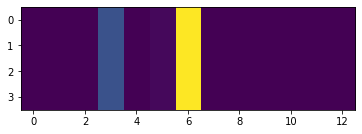

In [64]:
p.imshow(im2)
p.show()

In [92]:
a = [6, 2, 3, 4]

In [94]:
1 < min(a)

True

In [89]:
b = []

In [91]:
len(b) == 0

True

In [96]:
c = tf.convert_to_tensor(a)

In [106]:
min(c.numpy())

2